In [1]:
import pandas as pd
import pytz
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

import seaborn as sns

In [2]:
# Load the dataset
file_path = '/Users/efeguclu/Desktop/cs210 project/deneme 2/StepCount.csv'
step_counts = pd.read_csv(file_path)

In [3]:
# Preprocessing functions
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('Europe/Istanbul'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month)  # More efficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day)  # More efficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

# Applying the preprocessing
step_counts['startDate'] = pd.to_datetime(step_counts['startDate'])
step_counts['year'] = step_counts['startDate'].map(get_year)
step_counts['month'] = step_counts['startDate'].map(get_month)
step_counts['date'] = step_counts['startDate'].map(get_date)
step_counts['day'] = step_counts['startDate'].map(get_day)
step_counts['hour'] = step_counts['startDate'].map(get_hour)
step_counts['dow'] = step_counts['startDate'].map(get_day_of_week)



In [25]:
step_counts.head()


,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value,year,month,date,day,hour,dow,day_of_week
0,Efe iPhone’u,14.2.1,"<<HKDevice: 0x282c3e990>, name:iPhone, manufac...",StepCount,count,2021-02-26 16:50:24 +0300,2021-02-26 16:39:21+03:00,2021-02-26 16:45:47 +0300,570,2021,2021-02,2021-02-26,26,19,4,Friday
1,Efe iPhone’u,14.2.1,"<<HKDevice: 0x282c3e990>, name:iPhone, manufac...",StepCount,count,2021-02-26 17:08:25 +0300,2021-02-26 16:57:22+03:00,2021-02-26 16:57:27 +0300,10,2021,2021-02,2021-02-26,26,19,4,Friday
2,Efe iPhone’u,14.2.1,"<<HKDevice: 0x282c3e990>, name:iPhone, manufac...",StepCount,count,2021-02-26 17:19:27 +0300,2021-02-26 17:08:00+03:00,2021-02-26 17:10:37 +0300,28,2021,2021-02,2021-02-26,26,20,4,Friday
3,Efe iPhone’u,14.2.1,"<<HKDevice: 0x282c3e990>, name:iPhone, manufac...",StepCount,count,2021-02-26 17:32:48 +0300,2021-02-26 17:21:46+03:00,2021-02-26 17:29:46 +0300,170,2021,2021-02,2021-02-26,26,20,4,Friday
4,Efe iPhone’u,14.2.1,"<<HKDevice: 0x282c3e990>, name:iPhone, manufac...",StepCount,count,2021-02-26 17:55:48 +0300,2021-02-26 17:44:46+03:00,2021-02-26 17:53:23 +0300,199,2021,2021-02,2021-02-26,26,20,4,Friday


In [4]:
steps_by_date = step_counts.groupby(['date'])['value'].sum().reset_index(name='steps')


In [5]:
steps_by_date.describe()

,steps
count,1015.000000
mean,11046.523153
std,5040.076389
min,245.000000
25%,7805.500000
50%,10831.000000
75%,14151.000000
max,35494.000000


In [6]:
steps_by_date.head()

,date,steps
0,2021-02-26,3985
1,2021-02-27,5905
2,2021-02-28,2423
3,2021-03-01,13604
4,2021-03-02,10500


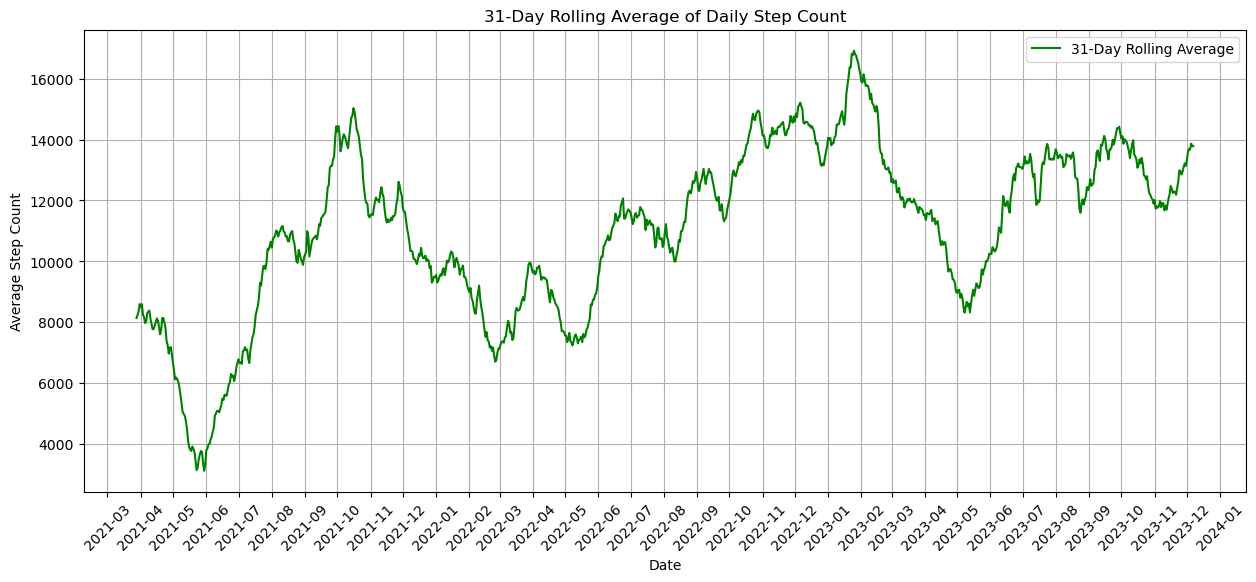

In [7]:
# Convert the 'date' column to datetime
steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])

# Set the 'date' column as the index
steps_by_date.set_index('date', inplace=True)

# Now, when plotting, the index (which is the 'date') will be used for the x-axis
plt.figure(figsize=(15, 6))
plt.plot(steps_by_date.index, steps_by_date['steps'].rolling(window=31).mean(), label='31-Day Rolling Average', color='green')
plt.title('31-Day Rolling Average of Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Average Step Count')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Display one tick per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format the date
plt.xticks(rotation=45)
plt.show()
###
###The rolling average appears to show distinct trends at different times of the year.
##Notably, there is an increase in activity during the winter and summer months, while a decrease is observed in spring.

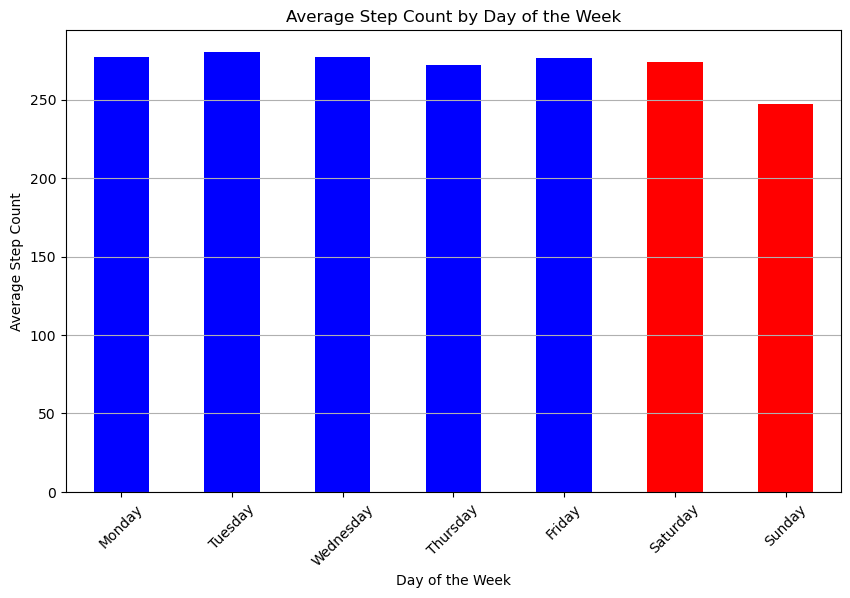

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure the 'value' column is numeric
step_counts['value'] = pd.to_numeric(step_counts['value'], errors='coerce')

# Mapping the 'dow' numbers to day names
dow_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
step_counts['day_of_week'] = step_counts['dow'].map(dow_names)

# Aggregate the total steps for each 'day_of_week'
total_steps_per_day_of_week = step_counts.groupby('day_of_week')['value'].sum()

# Calculate the average step count for each day of the week
# Assuming you have multiple weeks of data
average_steps_per_day_of_week = total_steps_per_day_of_week / step_counts['day_of_week'].value_counts()

# Reorder the days for proper sequencing
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_steps_per_day_of_week = average_steps_per_day_of_week.reindex(ordered_days)

# Define colors for weekdays and weekends
colors = ['blue' if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'red' for day in ordered_days]

plt.figure(figsize=(10, 6))
average_steps_per_day_of_week.plot(kind='bar', color=colors)
plt.title('Average Step Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.grid(axis='y')
plt.show()

##it shows that my avg for weekends is lower than avg of weekdays which was something i expected


/Users/efeguclu/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


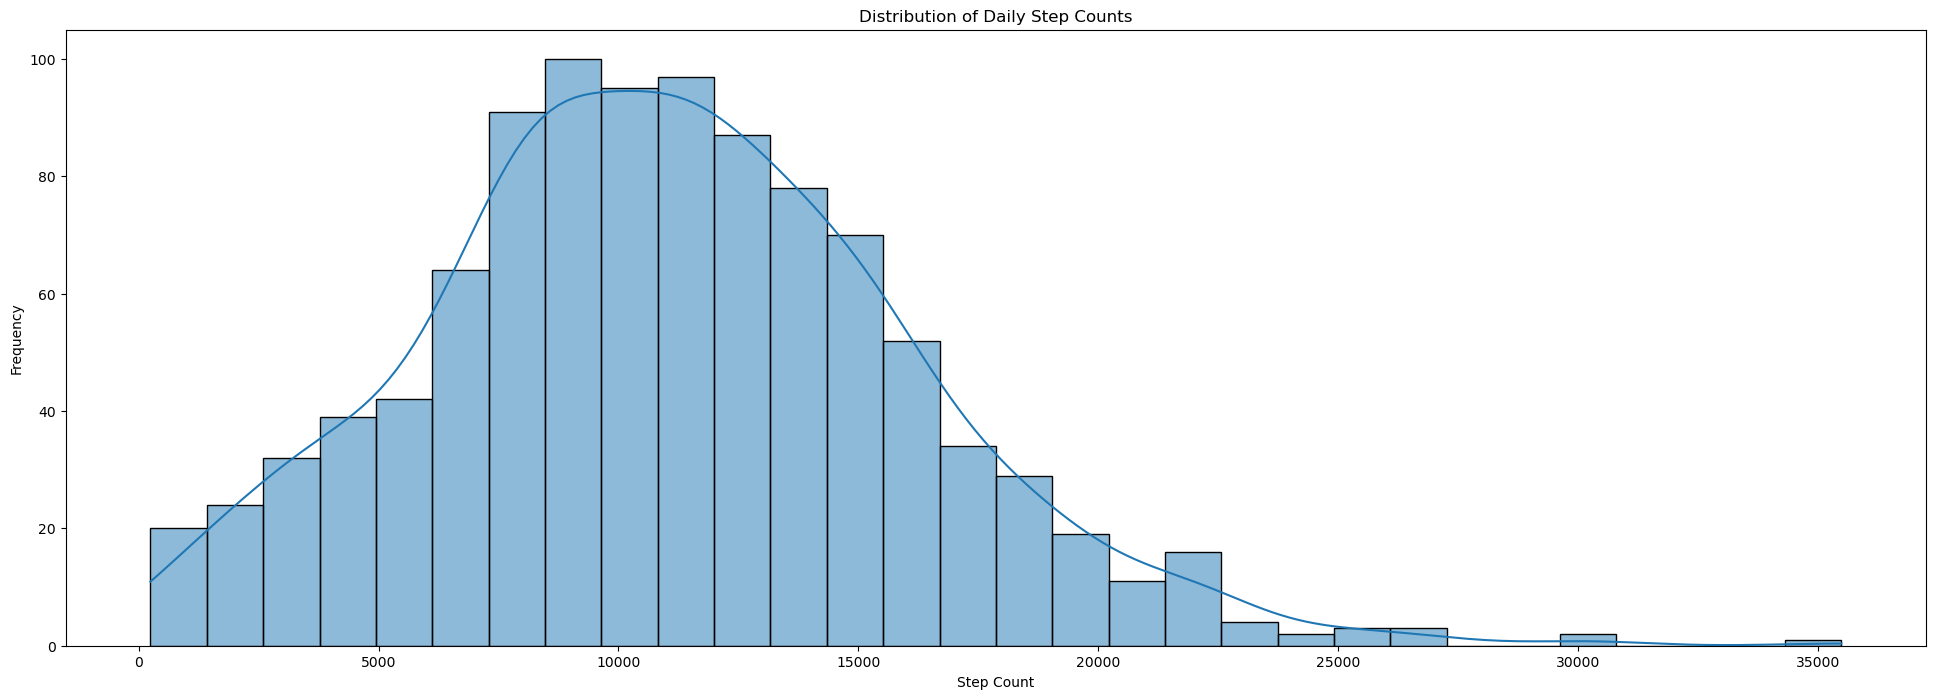

In [9]:

# Create a larger figure
plt.figure(figsize=(24, 8))

# Histogram for Step Counts
sns.histplot(steps_by_date['steps'], bins=30, kde=True)
plt.title('Distribution of Daily Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Frequency')

# Display the plot
plt.show()

##it looks like a normal distrubition most of the values are around 10k steps

Text(0, 0.5, 'Step Count')

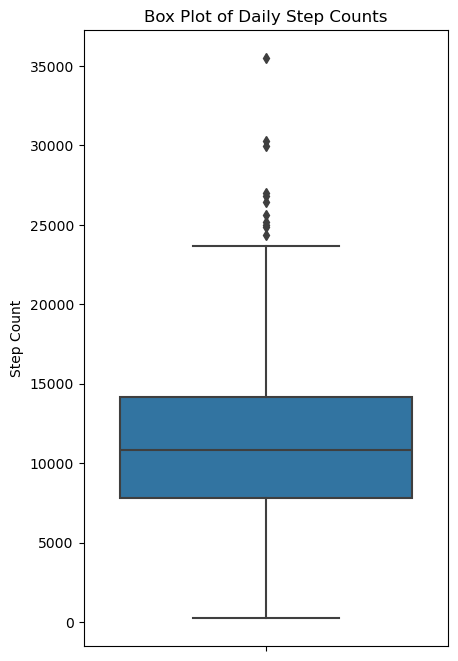

In [10]:
# Box Plot for Step Counts

plt.figure(figsize=(16, 8))

plt.subplot(1, 3, 3)
sns.boxplot(y=steps_by_date['steps'])
plt.title('Box Plot of Daily Step Counts')
plt.ylabel('Step Count')

In [12]:
hour_steps = step_counts.groupby(['hour'])['value'].sum().reset_index(name='Steps')


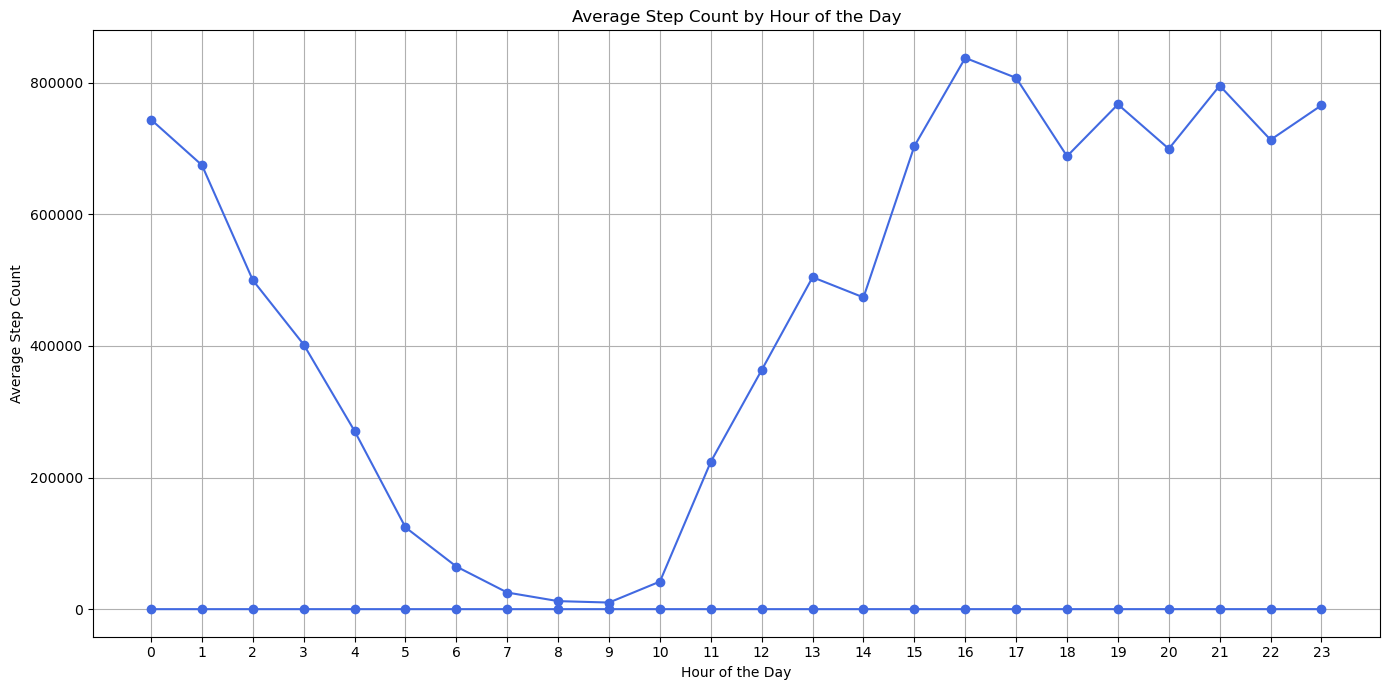

In [13]:
# Ensure 'hour' and 'value' are correct data types


# Group by 'hour' and get the average 'value' for each hour

# Plotting the line graph
plt.figure(figsize=(14, 7))
plt.plot(hour_steps.index, hour_steps, marker='o', linestyle='-', color='royalblue')
plt.title('Average Step Count by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Step Count')
plt.xticks(range(0, 24))  # Assuming hour is in 24-hour format
plt.grid(True)
plt.tight_layout()  # Adjust the padding of the plot
plt.show()


In [14]:
sleep_data_path = '/Users/efeguclu/Desktop/cs210 project/deneme 2/SleepAnalysis.csv'
sleep_data = pd.read_csv(sleep_data_path)
sleep_data.head()
# Get the data types of each column


,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Efe iPhone’u,14.2.1,NaN,SleepAnalysis,NaN,2021-02-27 07:55:14 +0300,2021-02-27 01:00:00 +0300,2021-02-27 07:33:16 +0300,HKCategoryValueSleepAnalysisInBed
1,Efe iPhone’u,14.2.1,NaN,SleepAnalysis,NaN,2021-02-27 07:55:14 +0300,2021-02-27 07:33:21 +0300,2021-02-27 07:33:23 +0300,HKCategoryValueSleepAnalysisInBed
2,Efe iPhone’u,14.2.1,NaN,SleepAnalysis,NaN,2021-02-27 07:55:14 +0300,2021-02-27 07:33:28 +0300,2021-02-27 07:55:14 +0300,HKCategoryValueSleepAnalysisInBed
3,Efe iPhone’u,14.4,NaN,SleepAnalysis,NaN,2021-02-28 08:07:13 +0300,2021-02-28 01:00:00 +0300,2021-02-28 06:31:31 +0300,HKCategoryValueSleepAnalysisInBed
4,Efe iPhone’u,14.4,NaN,SleepAnalysis,NaN,2021-02-28 08:07:13 +0300,2021-02-28 07:13:19 +0300,2021-02-28 07:35:04 +0300,HKCategoryValueSleepAnalysisInBed


In [15]:
# Function to convert date strings to datetime objects
def convert_to_datetime(df, column_name):
    return pd.to_datetime(df[column_name], format='%Y-%m-%d %H:%M:%S %z')

sleep_data['startDate'] = convert_to_datetime(sleep_data, 'startDate')
sleep_data['endDate'] = convert_to_datetime(sleep_data, 'endDate')

In [16]:
# Calculating total sleep duration per day
sleep_data['SleepDuration'] = (sleep_data['endDate'] - sleep_data['startDate']).dt.total_seconds() / 3600  # hours
sleep_data['Date'] = sleep_data['startDate'].dt.date
daily_sleep = sleep_data.groupby('Date')['SleepDuration'].sum().reset_index()

In [17]:
daily_sleep.describe()

,SleepDuration
count,993.000000
mean,6.379957
std,3.075003
min,0.000833
25%,5.429722
50%,6.143611
75%,6.906667
max,33.624722


In [18]:
daily_sleep.head(11)


,Date,SleepDuration
0,2021-02-27,6.917778
1,2021-02-28,5.946944
2,2021-03-01,6.880000
3,2021-03-02,6.825278
4,2021-03-03,6.376667
5,2021-03-04,6.505556
6,2021-03-05,6.853611
7,2021-03-06,6.921944
8,2021-03-07,6.919722
9,2021-03-08,6.666111


In [19]:

# Assuming 'daily_sleep' is your DataFrame and it's already loaded
# Calculate the mean sleep duration while excluding the outliers
mean_sleep_duration = daily_sleep[(daily_sleep['SleepDuration'] <= 12) & (daily_sleep['SleepDuration'] >= 2)]['SleepDuration'].mean()

# Replace values where sleep duration is greater than 12 hours with the mean
daily_sleep.loc[daily_sleep['SleepDuration'] > 12, 'SleepDuration'] = mean_sleep_duration

# Replace values where sleep duration is less than 2 hours with 2 hours
daily_sleep.loc[daily_sleep['SleepDuration'] < 2, 'SleepDuration'] = 2

# Now your daily_sleep DataFrame should have the corrected values


In [20]:
daily_sleep.describe()

,SleepDuration
count,993.000000
mean,5.920021
std,1.347388
min,2.000000
25%,5.429722
50%,6.093145
75%,6.743889
max,11.076389


In [21]:
daily_sleep.head(11)

,Date,SleepDuration
0,2021-02-27,6.917778
1,2021-02-28,5.946944
2,2021-03-01,6.880000
3,2021-03-02,6.825278
4,2021-03-03,6.376667
5,2021-03-04,6.505556
6,2021-03-05,6.853611
7,2021-03-06,6.921944
8,2021-03-07,6.919722
9,2021-03-08,6.666111


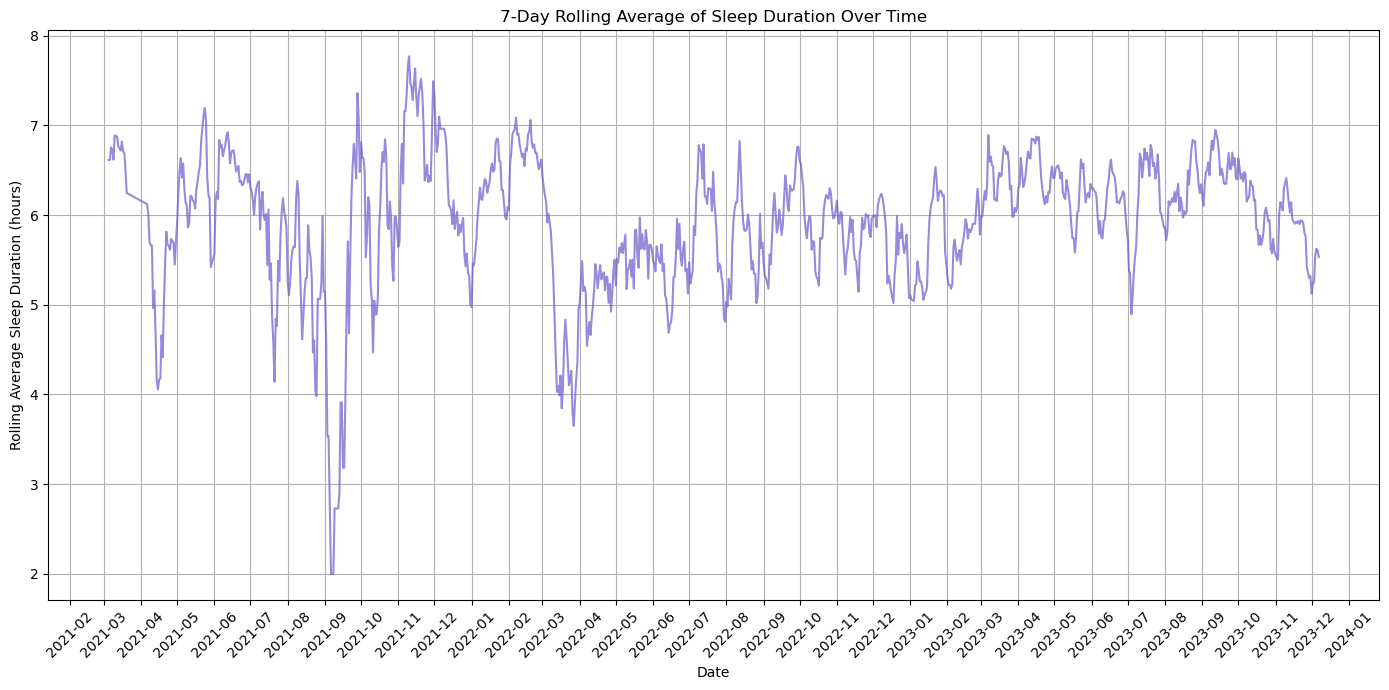

In [22]:
# Set 'Date' as the index
daily_sleep.set_index('Date', inplace=True)

# Calculate the rolling average with a window; you can adjust the window size as needed
window_size = 7  # 7-day rolling average
daily_sleep['RollingAvgSleep'] = daily_sleep['SleepDuration'].rolling(window=window_size).mean()

# Plotting the smoothed line graph with the rolling average
plt.figure(figsize=(14, 7))
plt.plot(daily_sleep.index, daily_sleep['RollingAvgSleep'], linestyle='-', color='slateblue', alpha=0.7)

# Format the date axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Improve readability
plt.title('7-Day Rolling Average of Sleep Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Rolling Average Sleep Duration (hours)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust the padding of the plot
plt.show()
#This code will plot a 7-day rolling average of the sleep duration data. By smoothing the data with a rolling average, each point on the linegraph
## As far as i understand when school starts at october my sleep avg decreases

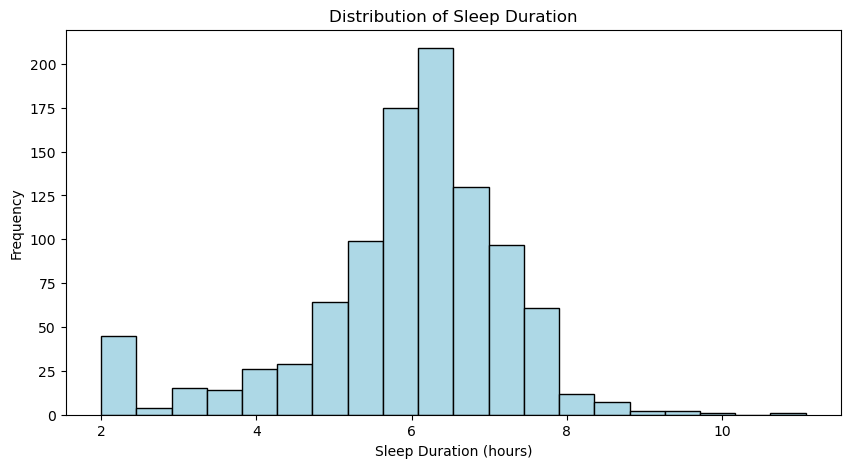

In [23]:
# Histogram of sleep duration
plt.figure(figsize=(10, 5))
plt.hist(daily_sleep['SleepDuration'], bins=20, color='lightblue', edgecolor='black')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Hours of Sleep')

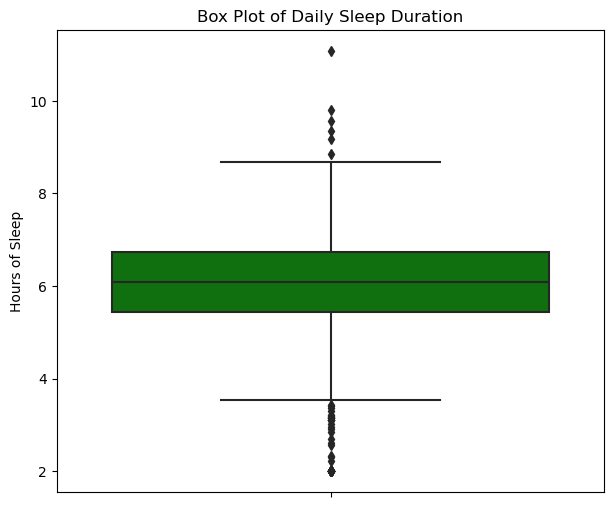

In [24]:
# Box Plot for Sleep Duration
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 3)
sns.boxplot(y=daily_sleep['SleepDuration'], color='green')
plt.title('Box Plot of Daily Sleep Duration')
plt.ylabel('Hours of Sleep')